# UAS Data Analysis

Nama : Reina Ratu Balqis 


In [1]:
# import 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn import tree
import sklearn.tree as tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings("ignore")

In [2]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
numerical = heart.select_dtypes(include="number").columns.tolist() 
categorical = heart.select_dtypes(include="object").columns.tolist()

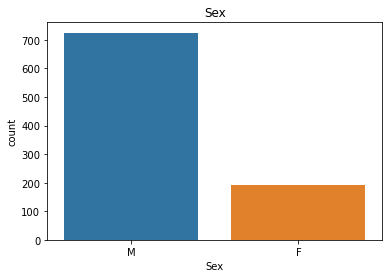

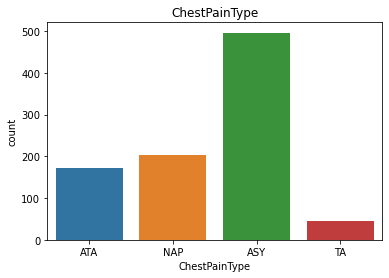

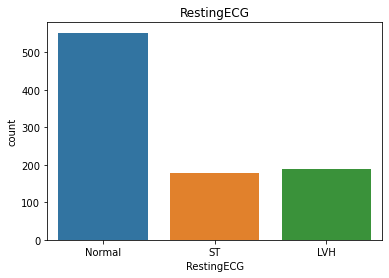

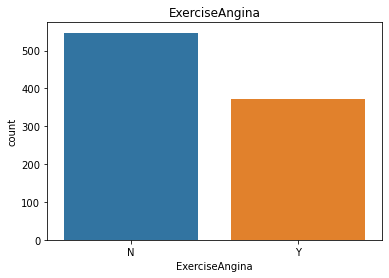

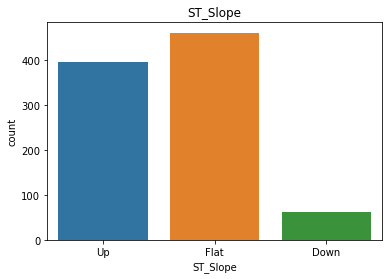

In [7]:
heart_categoric = heart.loc[:, categorical]
for i in categorical:
    plt.figure()
    sns.countplot(x = i, data = heart_categoric)
    plt.title(i)

In [8]:
for feature in categorical:
    print(heart[feature].value_counts())
    print('------')

M    725
F    193
Name: Sex, dtype: int64
------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
------


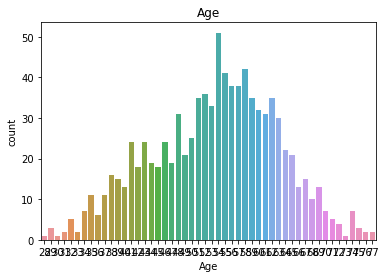

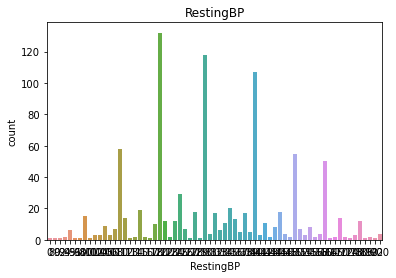

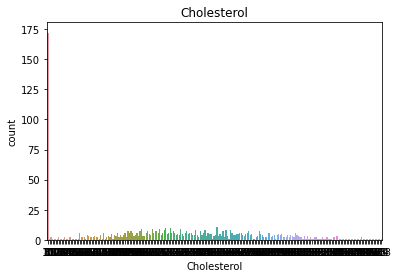

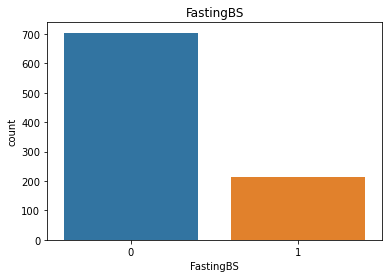

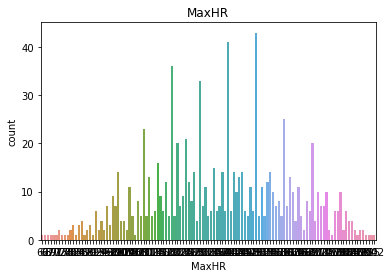

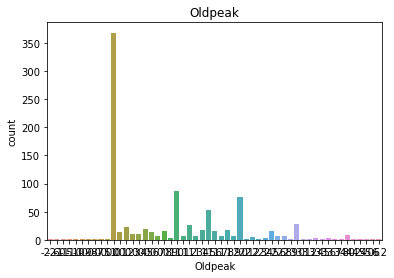

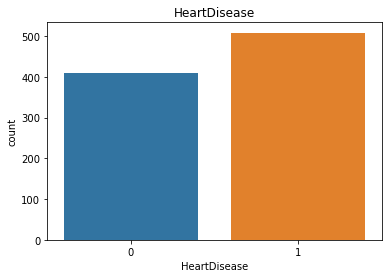

In [9]:
heart_numerical = heart.loc[:, numerical]
for i in numerical:
    plt.figure()
    sns.countplot(x=i, data=heart_numerical)
    plt.title(i)

In [10]:
heart.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


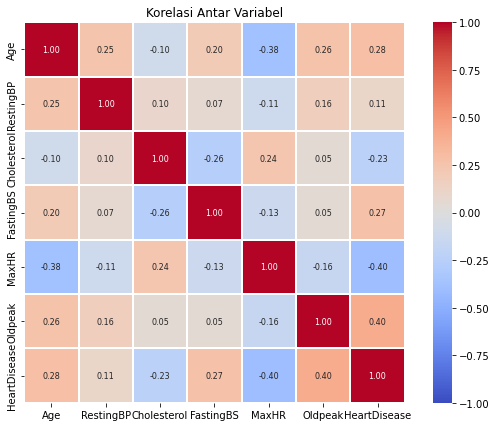

In [11]:
corr = heart.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

In [12]:
X = heart[['Age', 'FastingBS', 'RestingBP','Oldpeak']].values
Y = heart['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

## Algoritma 1 
### Decision Tree

In [13]:
# dtree = DecisionTreeClassifier()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Text(83.40000000000006, 0.5, 'Predicted Label')

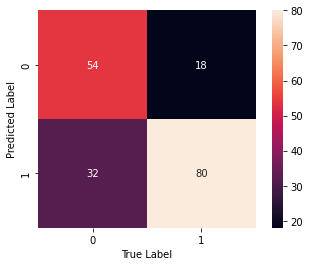

In [14]:
y_pred_dtree = dtree.predict(X_test)

dtree_matrix = metrics.confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(dtree_matrix.T, annot=True, square=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [15]:
dtree_score = cross_val_score(dtree, X_train, y_train, cv=10)

print('Decision Tree Cross Validation Accuracy Score', dtree_score)
dtree_score.min(), dtree_score.mean(), dtree_score.max()

Decision Tree Cross Validation Accuracy Score [0.68918919 0.74324324 0.7027027  0.7027027  0.68493151 0.76712329
 0.78082192 0.71232877 0.69863014 0.73972603]


(0.684931506849315, 0.7221399481673454, 0.7808219178082192)

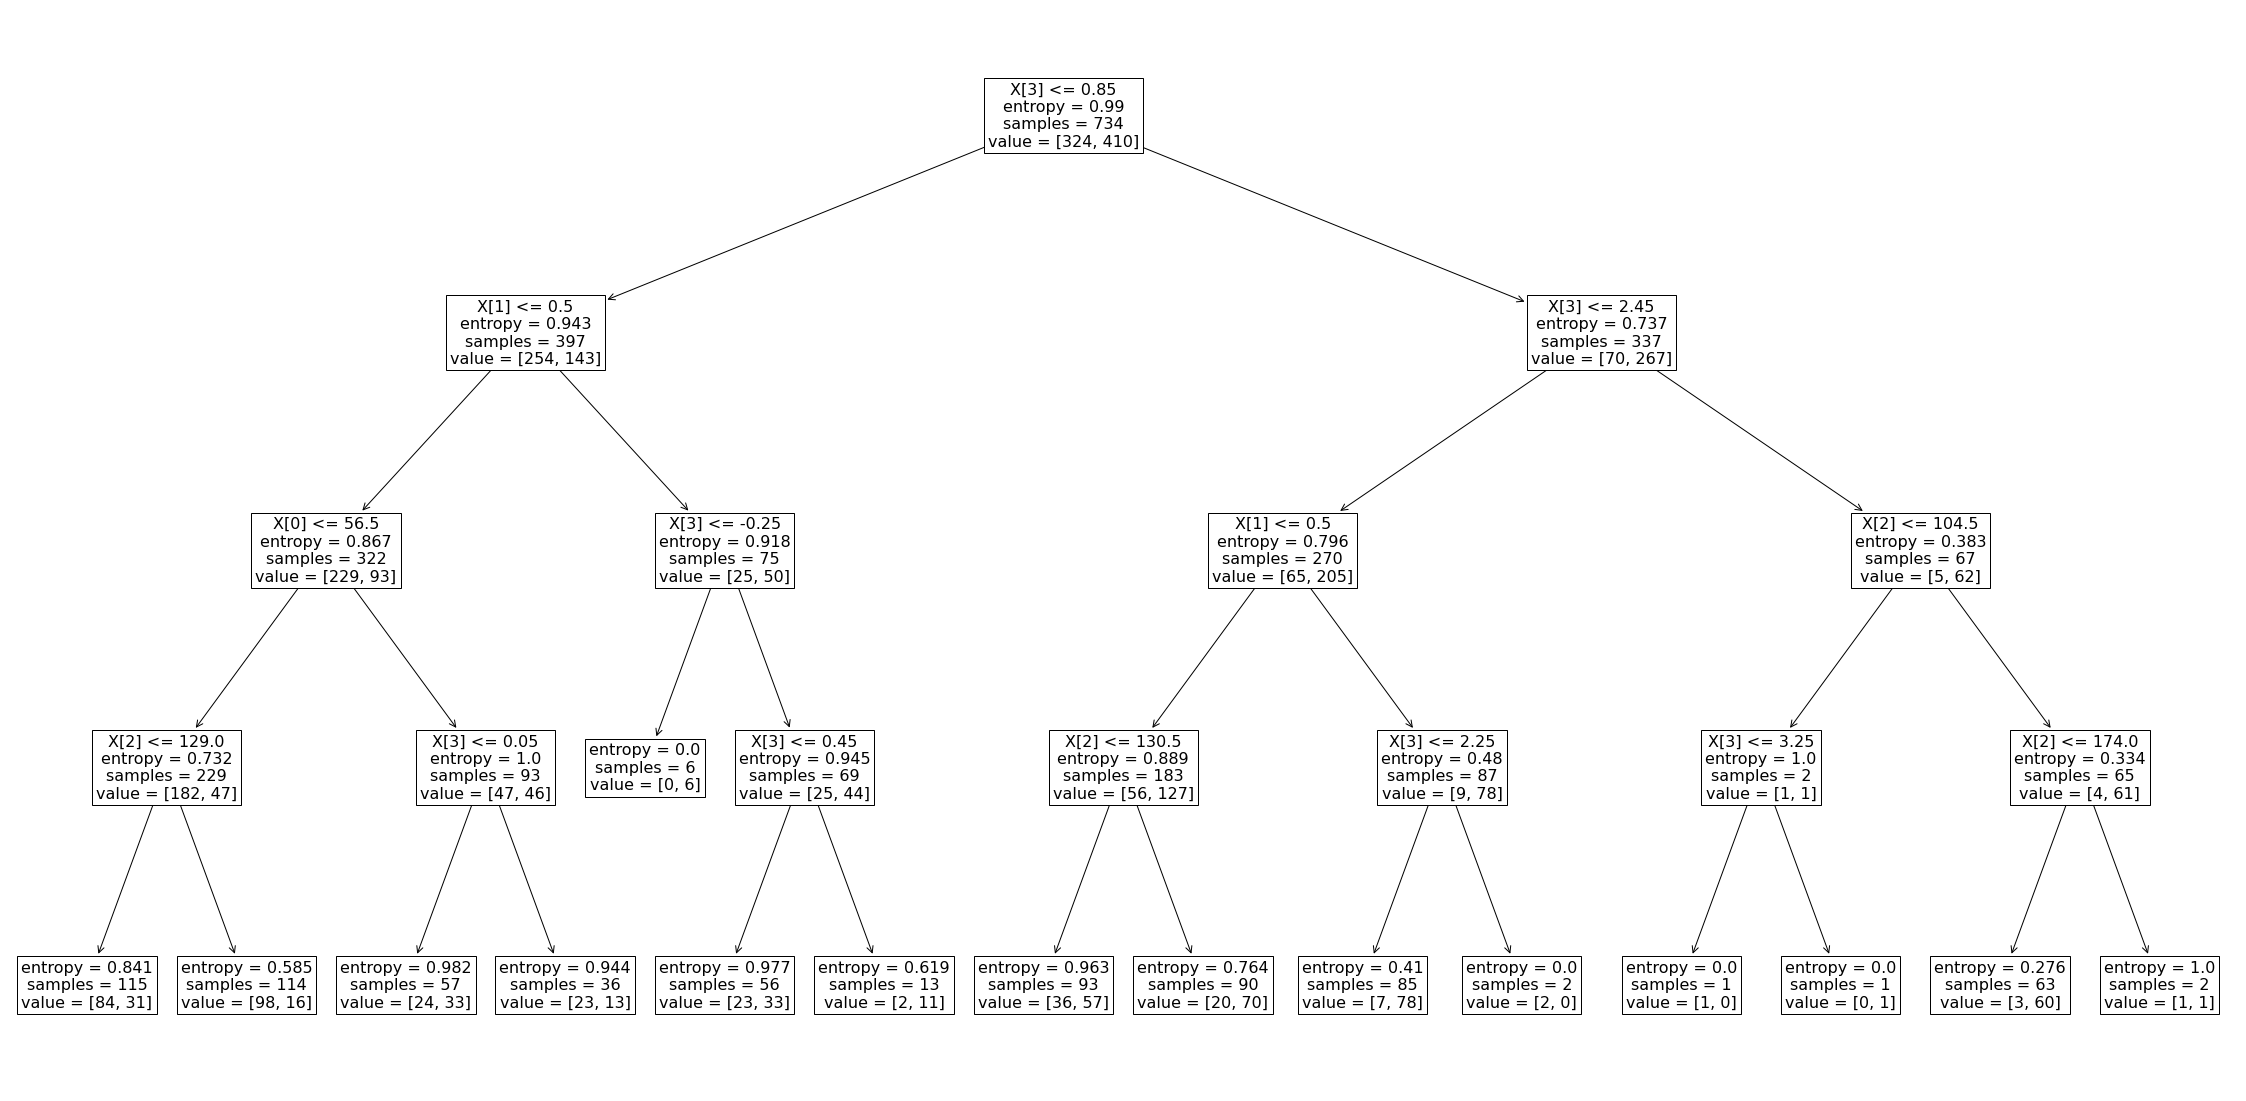

In [16]:
plt.figure(figsize=(40,20))
tree.plot_tree(dtree, fontsize=16)
plt.show()

In [17]:
print('Decision Tree Classification Report')
cr = metrics.classification_report(y_test, y_pred_dtree)
print(cr)

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.75      0.63      0.68        86
           1       0.71      0.82      0.76        98

    accuracy                           0.73       184
   macro avg       0.73      0.72      0.72       184
weighted avg       0.73      0.73      0.73       184



In [18]:
print("Misclassification error rate:", round(np.mean(y_pred_dtree!=y_test),3))

Misclassification error rate: 0.272


## Algoritma 2
### KNN

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# mengaktifkan fungsi classifikasi utk KNN
knn = KNeighborsClassifier(n_neighbors=4)

In [21]:
# memasukkan data training pada fungsi classifikasi utk KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Text(83.40000000000006, 0.5, 'Predicted Label')

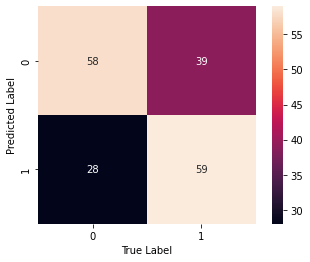

In [22]:
# menentukkan prediksi
pred_KNN = knn.predict (X_test)

KNN_matrix = metrics.confusion_matrix(y_test, pred_KNN)
sns.heatmap(KNN_matrix.T, annot=True, square=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [23]:
# menentukkan probabilitas prediksi
knn.predict_proba(X_test)

array([[0.5 , 0.5 ],
       [0.25, 0.75],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.25, 0.75],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.75,

In [24]:
# import package untuk meLihat keakuratan data prediksi dengan data aktual
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
# menampilan matriks hasil prediksi
print(confusion_matrix(y_test, pred_KNN))

[[58 28]
 [39 59]]


In [26]:
# ketepatan hasil prediksi
print('KNN Classification Report')
print(classification_report(y_test, pred_KNN))

KNN Classification Report
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        86
           1       0.68      0.60      0.64        98

    accuracy                           0.64       184
   macro avg       0.64      0.64      0.64       184
weighted avg       0.64      0.64      0.64       184



In [27]:
print("Misclassification error rate:", round(np.mean(pred_KNN!=y_test),3))

Misclassification error rate: 0.364


In [28]:
knn_score = cross_val_score(knn, X_train, y_train, cv=10)

print('KNN Cross Validation Accuracy Score', knn_score)
knn_score.min(), knn_score.mean(), knn_score.max()

KNN Cross Validation Accuracy Score [0.68918919 0.74324324 0.72972973 0.59459459 0.67123288 0.68493151
 0.68493151 0.65753425 0.71232877 0.76712329]


(0.5945945945945946, 0.693483894853758, 0.7671232876712328)